In [1]:
import os 
import tensorflow as tf

# Importing matplotlib to plot images.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Importing SK-learn to calculate precision and recall
import sklearn
import sklearn.metrics
tf.__version__

2024-02-07 17:17:14.452630: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-07 17:17:15.899460: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.12.1'

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
shape = (28, 28, 1)
# reshape image data
x_train = x_train.reshape(-1, shape[0] *  shape[1] * shape[2])
x_test = x_test.reshape(-1, shape[0] *  shape[1] * shape[2])

# convert to float
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

# normalize to a scale between -1 and 1
x_train = x_train / 127.5 -1
x_test = x_test / 127.5 -1

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices (one-hot notation)
num_classes = 10
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


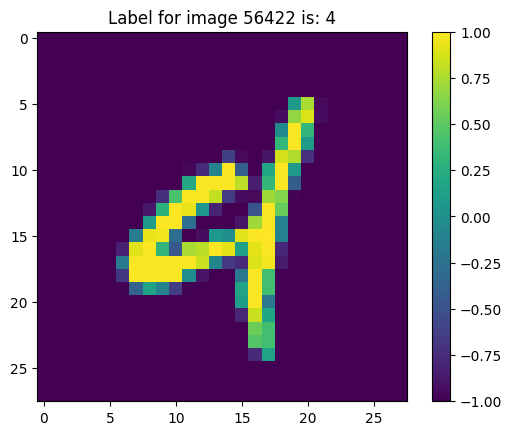

In [4]:
np.random.seed(42)
i = np.random.randint(0, len(x_train))
plt.imshow(x_train[i].reshape(shape))
plt.title("Label for image %i is: %s" % (i, y_train[i]))
plt.colorbar()

## GPU and CPU settings
If GPU is not available, comment out the bottom block.

In [5]:
if True:
    # Enter either 0 or 1 below to select the GPU to use
    os.environ["CUDA_VISIBLE_DEVICES"]="0"

    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    tf.config.set_visible_devices(physical_devices[0], 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [6]:
########## HYPER PARAMETERS
batch_size = 128
epochs = 10
optimizer = tf.keras.optimizers.Adam()
########## HYPER PARAMETERS

########## MODEL ARCHITECTURE
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(None, shape[0] *  shape[1] * shape[2]), name="input"))
model.add(tf.keras.layers.Reshape((shape[0], shape[1], shape[2])))
model.add(tf.keras.layers.Conv2D(5, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
########## MODEL ARCHITECTURE

# Print summary
model.summary()

# compile model for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_one_hot))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 5)         50        
                                                                 
 flatten (Flatten)           (None, 3380)              0         
                                                                 
 dense (Dense)               (None, 10)                33810     
                                                                 
Total params: 33,860
Trainable params: 33,860
Non-trainable params: 0
_________________________________________________________________


2024-02-07 17:17:19.303830: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30300 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:62:00.0, compute capability: 7.0


Epoch 1/10


2024-02-07 17:17:21.240131: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-02-07 17:17:21.528398: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f8f2c061580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-07 17:17:21.528460: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-02-07 17:17:21.542359: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-07 17:17:21.765678: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 4s 4ms/step - loss: 0.3931 - accuracy: 0.8880 - val_loss: 0.2196 - val_accuracy: 0.9349
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1733 - accuracy: 0.9503 - val_loss: 0.1439 - val_accuracy: 0.9591
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1215 - accuracy: 0.9652 - val_loss: 0.1190 - val_accuracy: 0.9666
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0965 - accuracy: 0.9720 - val_loss: 0.0964 - val_accuracy: 0.9727
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0821 - accuracy: 0.9756 - val_loss: 0.0957 - val_accuracy: 0.9687
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0691 - accuracy: 0.9794 - val_loss: 0.0899 - val_accuracy: 0.9718
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0619 - accuracy: 0.9811 - val_loss: 0.0815 - val_accuracy: 0.9766
Epoch 8/10
469/46

# Plot training and test accuracy

In [7]:
# use model for inference to get test accuracy
y_test_pred = model.predict(x_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

print ('\n Summary of the precision, recall, F1 score for each class:')
print (sklearn.metrics.classification_report(y_test, y_test_pred))

print ('\n Confusion matrix: ')
print (sklearn.metrics.confusion_matrix(y_test, y_test_pred))

313/313 [==============================] - 1s 1ms/step

 Summary of the precision, recall, F1 score for each class:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.95      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


 Confusion matrix: 
[[ 975    0    2    0    0    1    0    1    1    0]
 [   2 1126    3    1    0    1    0    1    1    0

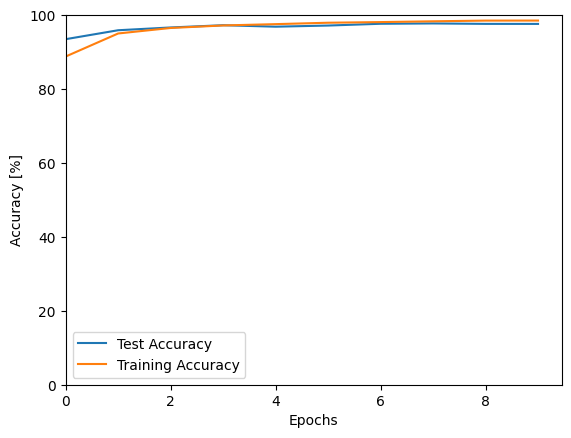

In [8]:
plt.plot(np.array(history.history['val_accuracy'])*100, label="Test Accuracy")
plt.plot(np.array(history.history['accuracy'])*100, label="Training Accuracy")
plt.ylabel("Accuracy [%]")
plt.xlabel("Epochs")
plt.ylim(0,100)
plt.xlim(0,)
plt.legend()

In [9]:
# save model
model.save("myModel.h5")